<a href="https://colab.research.google.com/github/bhagatprince438/Brainwave_Matrix_Intern/blob/main/TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Python Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [11]:
import pandas as pd
from google.colab import files

# Step 1: Upload the CSV file
uploaded = files.upload()

# Step 2: Read it into a DataFrame
# Replace with the exact filename if needed
df = pd.read_csv('Indian_Customer_Data.csv')

# Step 3: Preview the data
df.head()


Saving Indian_Customer_Data.csv to Indian_Customer_Data.csv


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status
0,100000,Emir Rege,P2246,Female,18-25,43,Married,Tamil Nadu,South,Teacher,Clothing,2,1386.44,Pending
1,100001,Aaryahi Chaudhry,P4384,Male,36-45,50,Divorced,Maharashtra,North,Doctor,Electronics,2,4048.97,Cancelled
2,100002,Vivaan Tailor,P8568,Female,36-45,31,Married,Gujarat,North,Business,Furniture,9,2632.27,Delivered
3,100003,Shalv Wadhwa,P6546,Female,26-35,50,Divorced,Maharashtra,West,Doctor,Furniture,9,4579.41,Cancelled
4,100004,Kiaan Madan,P5213,Other,18-25,48,Divorced,Karnataka,Central,Engineer,Books,9,1376.97,Cancelled


# ***Basic Data Analysis***

In [13]:
df.shape

(11251, 14)

In [15]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status
0,100000,Emir Rege,P2246,Female,18-25,43,Married,Tamil Nadu,South,Teacher,Clothing,2,1386.44,Pending
1,100001,Aaryahi Chaudhry,P4384,Male,36-45,50,Divorced,Maharashtra,North,Doctor,Electronics,2,4048.97,Cancelled
2,100002,Vivaan Tailor,P8568,Female,36-45,31,Married,Gujarat,North,Business,Furniture,9,2632.27,Delivered
3,100003,Shalv Wadhwa,P6546,Female,26-35,50,Divorced,Maharashtra,West,Doctor,Furniture,9,4579.41,Cancelled
4,100004,Kiaan Madan,P5213,Other,18-25,48,Divorced,Karnataka,Central,Engineer,Books,9,1376.97,Cancelled


In [39]:
print("Columns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Columns: ['user_id', 'cust_name', 'product_id', 'gender', 'age_group', 'age', 'marital_status', 'state', 'zone', 'occupation', 'product_category', 'orders', 'amount', 'status']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           11251 non-null  int64  
 1   cust_name         11251 non-null  object 
 2   product_id        11251 non-null  object 
 3   gender            11251 non-null  object 
 4   age_group         11251 non-null  object 
 5   age               11251 non-null  int64  
 6   marital_status    11251 non-null  object 
 7   state             11251 non-null  object 
 8   zone              11251 non-null  object 
 9   occupation        11251 non-null  object 
 10  product_category  11251 non-null  object 
 11  orders            11251 non-null  int64  
 12  amount            11251 non-null  float64
 1

In [17]:
#Clean column names (remove spaces, etc.)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

In [18]:
#Drop unnecessary/blank columns (like 'unnamed')
df = df.loc[:, ~df.columns.str.contains('^unnamed')]

In [19]:
#Descriptive Statistics
print(df.describe(include='all'))

              user_id     cust_name product_id  gender age_group  \
count    11251.000000         11251      11251   11251     11251   
unique            NaN         10568       6418       3         5   
top               NaN  Azad Sachdev      P4303  Female     46-55   
freq              NaN             4          7    3784      2313   
mean    105625.000000           NaN        NaN     NaN       NaN   
std       3248.028274           NaN        NaN     NaN       NaN   
min     100000.000000           NaN        NaN     NaN       NaN   
25%     102812.500000           NaN        NaN     NaN       NaN   
50%     105625.000000           NaN        NaN     NaN       NaN   
75%     108437.500000           NaN        NaN     NaN       NaN   
max     111250.000000           NaN        NaN     NaN       NaN   

                 age marital_status      state     zone occupation  \
count   11251.000000          11251      11251    11251      11251   
unique           NaN              3        

In [35]:
# Print the count of unique values in each categorical column
for col in categorical_columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())



Value counts for 'cust_name':
cust_name
Azad Sachdev          4
Saksham Tak           4
Zoya Kala             3
Advik Raman           3
Mohanlal Varughese    3
                     ..
Purab Kara            1
Yuvraj  Virk          1
Adira Karan           1
Jayant Sachar         1
Vidur Verma           1
Name: count, Length: 10568, dtype: int64

Value counts for 'product_id':
product_id
P4303    7
P3445    7
P2352    6
P7955    6
P5517    6
        ..
P1289    1
P1849    1
P2810    1
P4526    1
P7047    1
Name: count, Length: 6418, dtype: int64

Value counts for 'gender':
gender
Female    3784
Male      3751
Other     3716
Name: count, dtype: int64

Value counts for 'age_group':
age_group
46-55    2313
26-35    2259
18-25    2258
36-45    2225
56+      2196
Name: count, dtype: int64

Value counts for 'marital_status':
marital_status
Divorced    3789
Single      3773
Married     3689
Name: count, dtype: int64

Value counts for 'state':
state
Karnataka      2302
Maharashtra    2291
Tamil 

# **Data Visualization**

**Histogram of Numerical features**

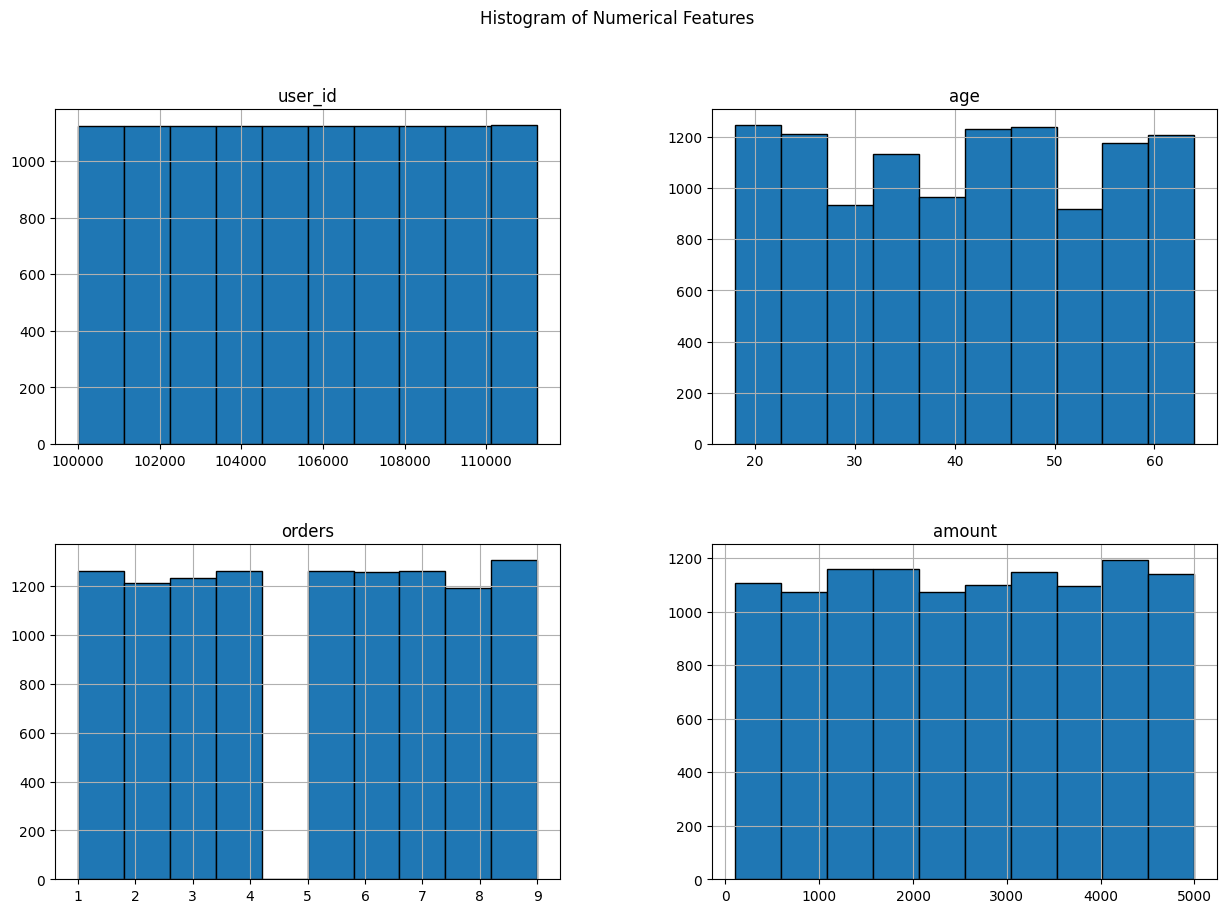

In [20]:
#Visualize Numeric Columns
df.hist(figsize=(15, 10), edgecolor='black')
plt.suptitle('Histogram of Numerical Features')
plt.show()

**Gender Distribution Graph**

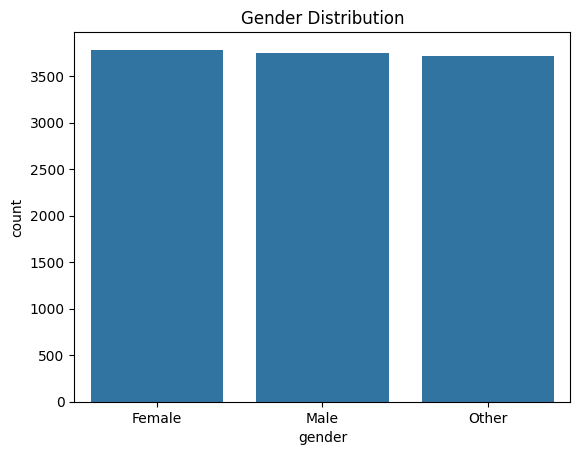

In [21]:
#Count Plot for a Categorical Column (edit column name)
if 'gender' in df.columns:
    sns.countplot(x='gender', data=df)
    plt.title('Gender Distribution')
    plt.show()

**Boxplot (to check outliers)**

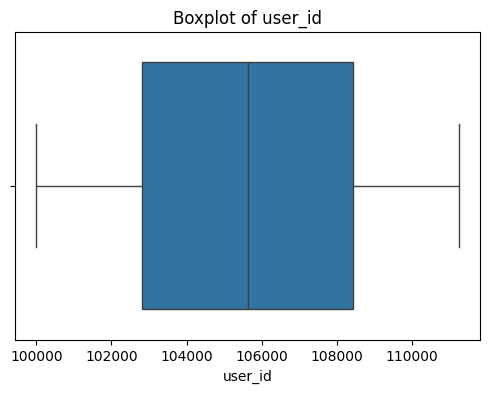

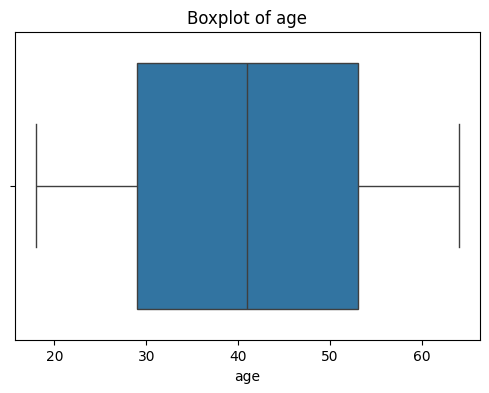

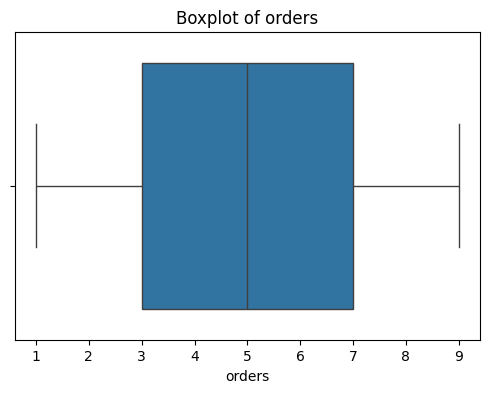

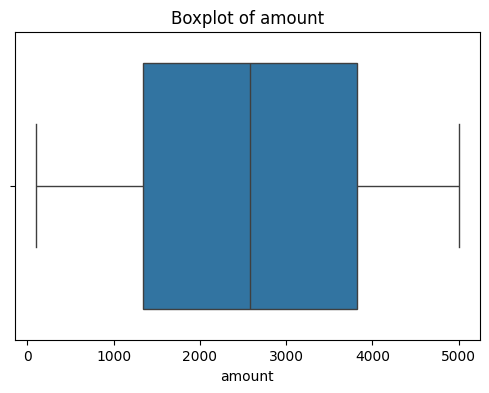

In [30]:
# Boxplot visualize outliers in each numeric column
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Correlation Matrix**

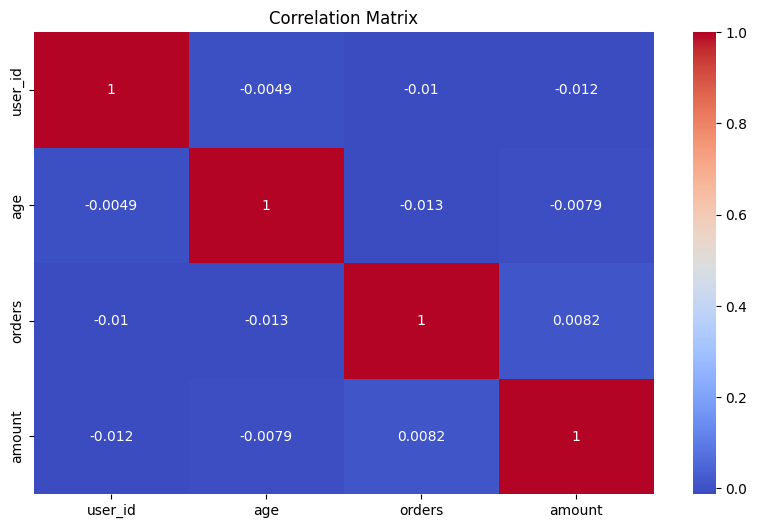

In [23]:
#Correlation Heatmap (numerical columns only)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Correlation** **Heatmap**



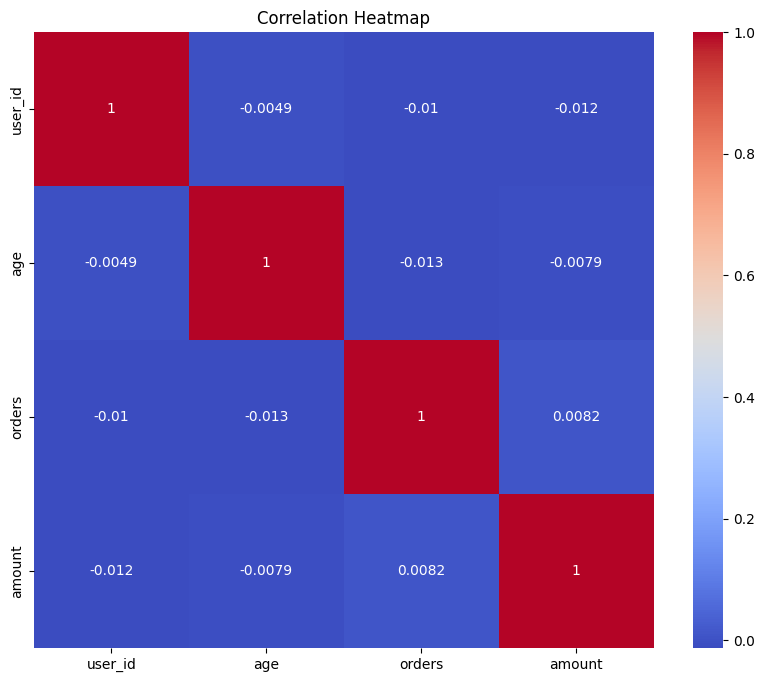

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Countplots for Categorical Columns**

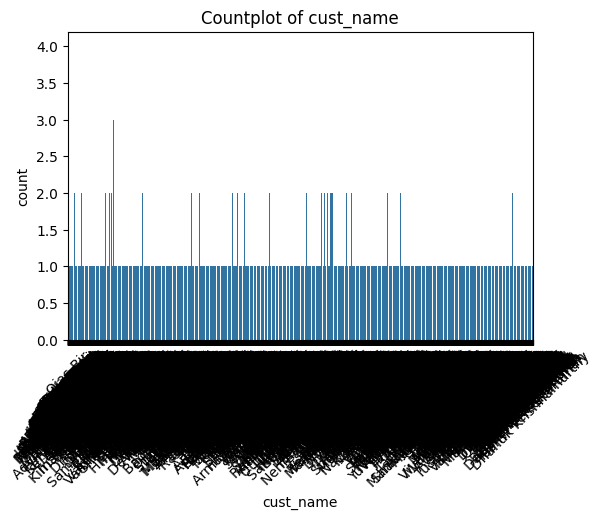

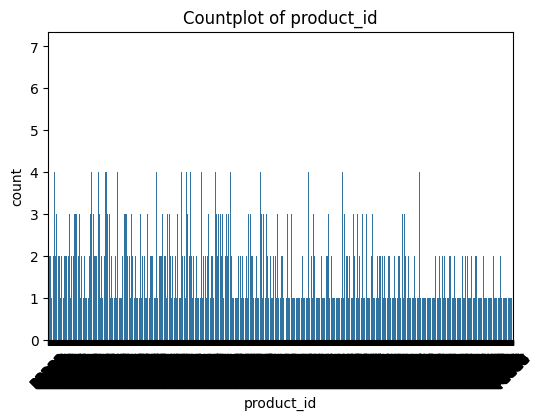

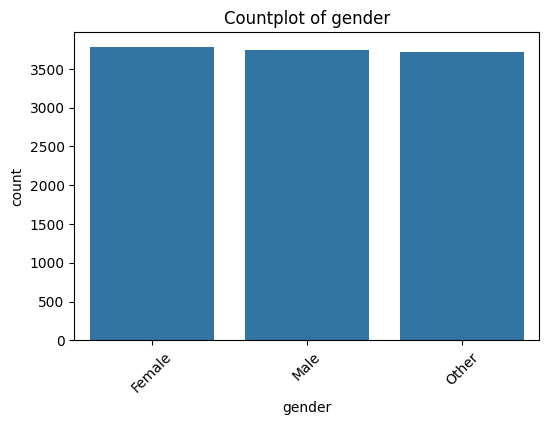

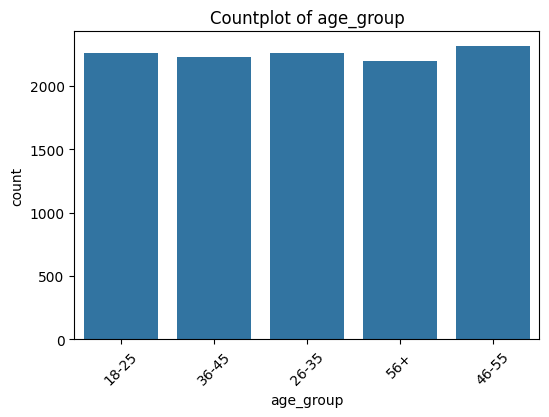

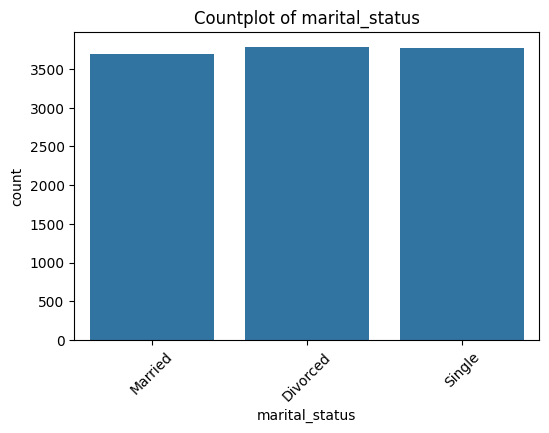

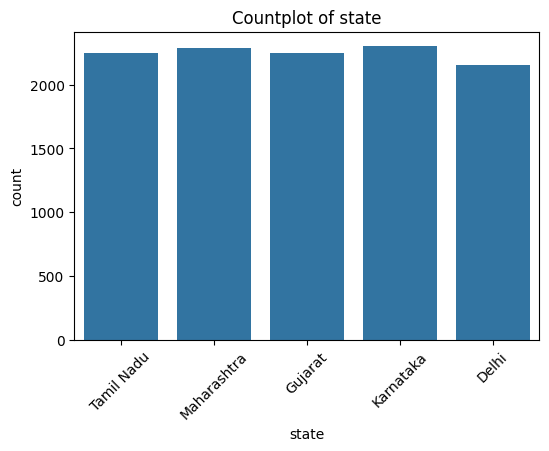

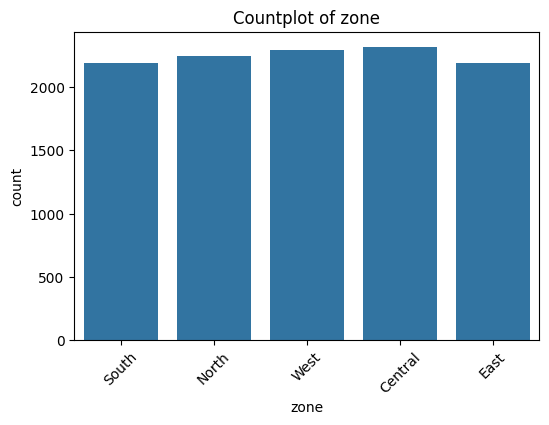

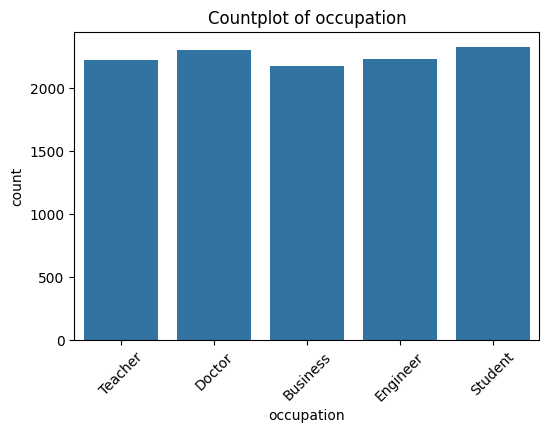

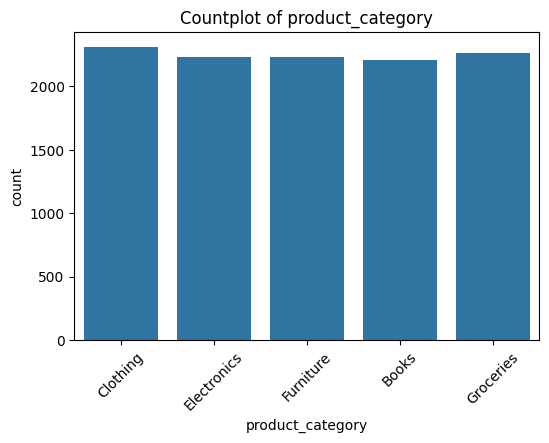

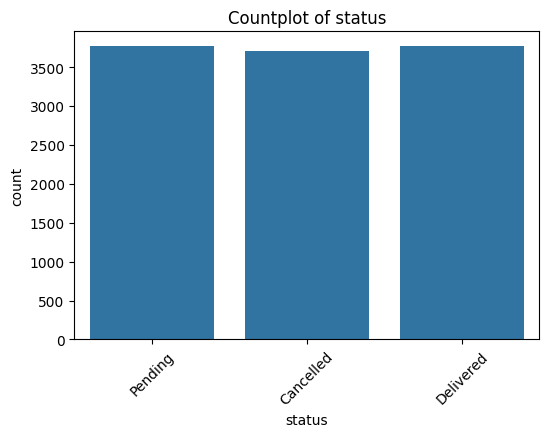

In [32]:
# Select categorical columns (strings/objects)
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Plot count of each category in each categorical column
if categorical_columns:
    for col in categorical_columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col)
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=45)  # Rotate for better readability
        plt.show()

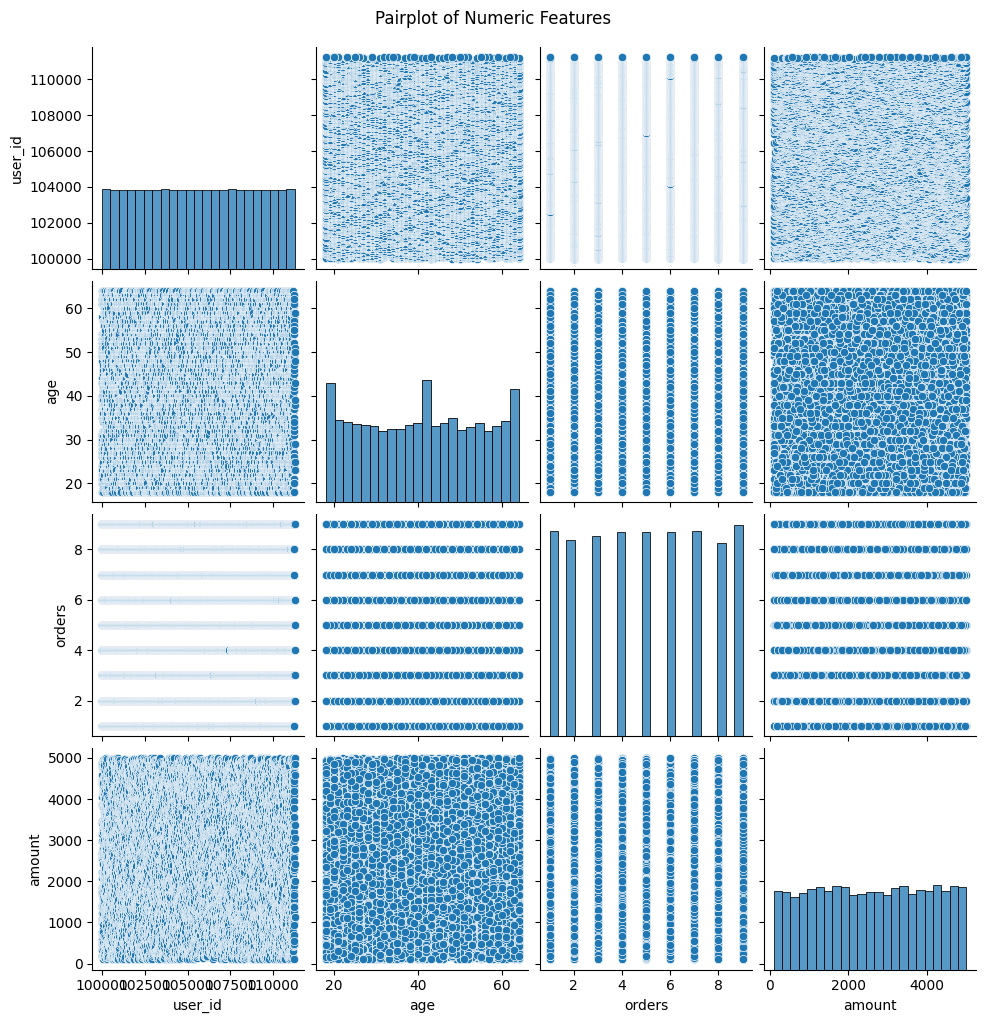

In [36]:
# This can be slow for large datasets
sns.pairplot(df[numeric_columns].dropna())
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


# Grouping and Aggregation

In [33]:
# Replace 'your_categorical_column' with a real column name
# Group by a categorical column and get mean of each numeric column
if categorical_columns:
    grouped_data = df.groupby(categorical_columns[0]).mean(numeric_only=True)
    print(f"Grouped data by {categorical_columns[0]}:")
    print(grouped_data)


Grouped data by cust_name:
               user_id   age  orders    amount
cust_name                                     
Aaina Arya    108658.0  60.0     2.0  3220.060
Aaina Bahri   109489.0  58.0     4.0  3224.600
Aaina Balay   107014.0  30.0     4.0  4697.030
Aaina Bansal  110231.0  42.0     4.0  1177.260
Aaina Barman  108568.5  32.0     3.5  3475.615
...                ...   ...     ...       ...
Zoya Swamy    109008.0  53.0     7.5  2211.710
Zoya Taneja   100865.0  31.0     8.0  1927.250
Zoya Vaidya   108288.0  60.0     8.0  2411.410
Zoya Varty    107454.5  46.5     8.5  3458.885
Zoya Wali     109759.0  43.0     8.0  4039.780

[10568 rows x 4 columns]
